In [4]:
# 高效机器学习与深度学习建模
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# 添加src目录到Python路径
project_path = Path("D:/VSCodeProjects/PythonCourse")
src_path = project_path / "src"
sys.path.append(str(src_path))

# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🚀 高效机器学习与深度学习建模")
print("=" * 50)

🚀 高效机器学习与深度学习建模


In [5]:
# 导入高效模型
from efficient_models import EfficientModelTrainer, run_multiple_experiments
from feature_engineering import MovieFeatureEngineer

# 加载数据
engineer = MovieFeatureEngineer()
movie_data = engineer.load_processed_data()

# 准备特征
features_df, feature_cols = engineer.prepare_modeling_features(movie_data)

print(f"📊 数据集信息:")
print(f"   样本数量: {len(features_df)}")
print(f"   特征数量: {len(feature_cols)}")
print(f"   目标变量分布:")
print(f"     - 回归目标: {features_df['target_regression'].describe()[['mean', 'std', 'min', 'max']].round(3)}")
print(f"     - 分类目标: {features_df['target_classification'].value_counts().sort_index().to_dict()}")

📁 加载处理后的数据...
✅ 数据加载完成: (9742, 36)
🔧 准备建模特征...
🏗️ 创建基础特征...
   创建了 6 个新特征
🎬 添加合成IMDb特征...
   添加了 4 个合成IMDb特征
🎯 创建目标变量...
   目标变量分布:
   - 回归目标范围: 0.00 - 5.00
   - 分类目标分布: {0: 2015, 1: 6467, 2: 1260}
   - 二分类分布: {0: 4409, 1: 5333}
   最终特征数量: 40
   特征列: ['year', 'genre_Film-Noir', 'genre_Fantasy', 'genre_Western', 'genre_Children', 'genre_Action', 'genre_Horror', 'genre_Crime', 'genre_Comedy', 'genre_Mystery', 'genre_Documentary', 'genre_Thriller', 'genre_Drama', 'genre_Animation', 'genre_(no genres listed)', 'genre_Musical', 'genre_War', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure', 'genre_IMAX', 'avg_rating', 'rating_count', 'rating_std', 'min_rating', 'max_rating', 'unique_users', 'rating_period_days', 'imdbId', 'tmdbId', 'movie_age', 'rating_count_log', 'has_high_rating_count', 'genre_count', 'has_multiple_genres', 'rating_stability', 'imdb_rating', 'has_imdb_rating', 'summary_length', 'director_count']
📊 数据集信息:
   样本数量: 9742
   特征数量: 40
   目标变量分布:
     - 回归目标: mean    3.256
std

In [6]:
# 运行高效模型实验
print("🧪 开始高效模型实验...")
regression_results, classification_results = run_multiple_experiments(
    features_df, feature_cols, num_experiments=3
)

🧪 开始高效模型实验...
🔬 开始多次实验验证

🏆 实验 1/3
----------------------------------------

🎯 开始REGRESSION任务实验
🤖 训练Scikit-learn模型...
   训练 RandomForest...
     RandomForest MAE: 0.0003
   训练 GradientBoosting...
     GradientBoosting MAE: 0.0003
   训练 Ridge...
     Ridge MAE: 0.0004
   训练 Lasso...
     Lasso MAE: 0.0779
   训练 KNN...
     KNN MAE: 0.2471
   训练 SVM...
     SVM MAE: 0.0630
🧠 训练深度学习模型...
    轮次 20, 训练损失: 0.0442, 验证损失: 0.0099
    轮次 40, 训练损失: 0.0297, 验证损失: 0.0041
    轮次 60, 训练损失: 0.0262, 验证损失: 0.0038
    早停在第 63 轮
    深度学习模型 MAE: 0.0485

🏆 REGRESSION任务模型排名:
----------------------------------------
   1. RandomForest: MAE = 0.0003
   2. GradientBoosting: MAE = 0.0003
   3. Ridge: MAE = 0.0004
   4. DeepLearning: MAE = 0.0485
   5. SVM: MAE = 0.0630
   6. Lasso: MAE = 0.0779
   7. KNN: MAE = 0.2471

🎯 开始MULTICLASS任务实验
🤖 训练Scikit-learn模型...
   训练 RandomForest...
     RandomForest 准确率: 1.0000
   训练 GradientBoosting...
     GradientBoosting 准确率: 1.0000
   训练 LogisticRegression...
     LogisticR

In [7]:
# 分析实验结果
def analyze_experiment_results(regression_results, classification_results):
    """分析多次实验结果"""
    
    # 提取回归任务结果
    reg_scores_summary = {}
    for i, result in enumerate(regression_results):
        for model, score in result['scores'].items():
            if model not in reg_scores_summary:
                reg_scores_summary[model] = []
            reg_scores_summary[model].append(score)
    
    # 提取分类任务结果
    cls_scores_summary = {}
    for i, result in enumerate(classification_results):
        for model, score in result['scores'].items():
            if model not in cls_scores_summary:
                cls_scores_summary[model] = []
            cls_scores_summary[model].append(score)
    
    # 计算统计量
    reg_stats = {}
    for model, scores in reg_scores_summary.items():
        reg_stats[model] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'min': np.min(scores),
            'max': np.max(scores)
        }
    
    cls_stats = {}
    for model, scores in cls_scores_summary.items():
        cls_stats[model] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'min': np.min(scores),
            'max': np.max(scores)
        }
    
    return reg_stats, cls_stats, reg_scores_summary, cls_scores_summary

reg_stats, cls_stats, reg_scores, cls_scores = analyze_experiment_results(
    regression_results, classification_results
)

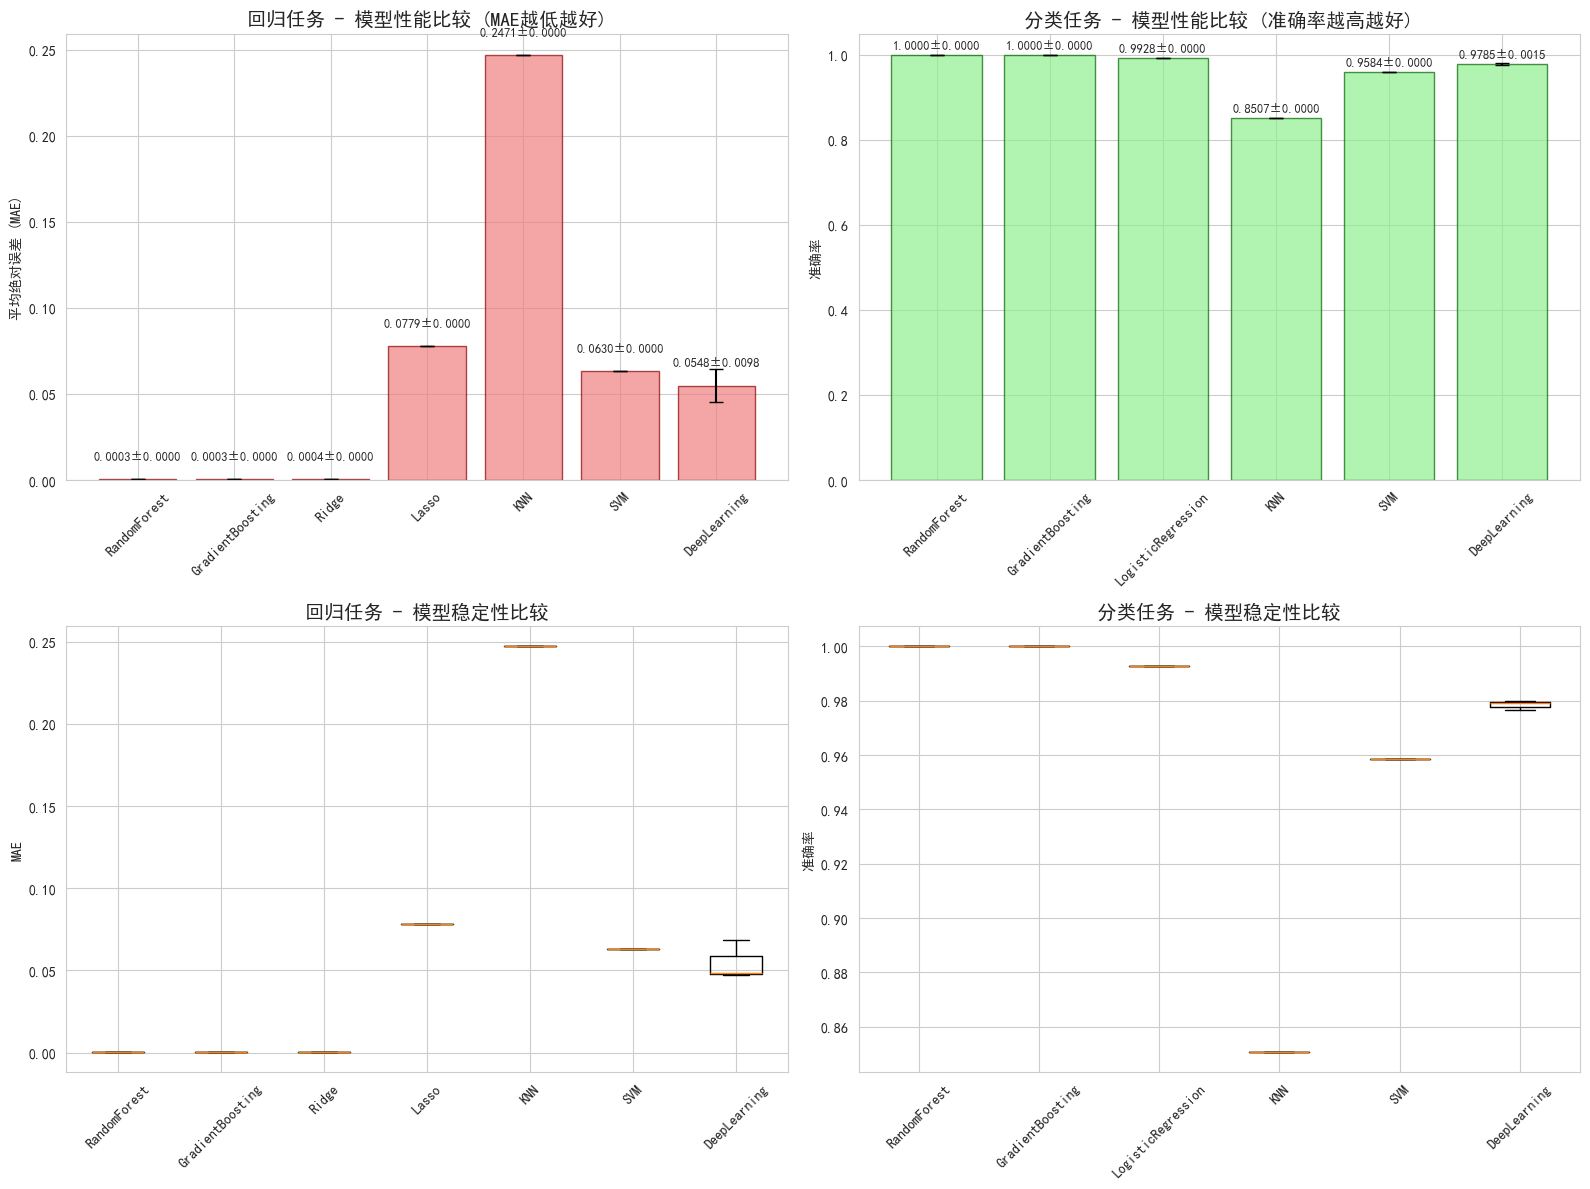

In [8]:
# 可视化实验结果
def visualize_experiment_results(reg_stats, cls_stats, reg_scores, cls_scores):
    """可视化实验结果"""
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 支持中文的字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 回归任务性能比较
    reg_models = list(reg_stats.keys())
    reg_means = [reg_stats[model]['mean'] for model in reg_models]
    reg_stds = [reg_stats[model]['std'] for model in reg_models]
    
    bars1 = ax1.bar(reg_models, reg_means, yerr=reg_stds, capsize=5, 
                   color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax1.set_title('回归任务 - 模型性能比较 (MAE越低越好)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('平均绝对误差 (MAE)')
    ax1.tick_params(axis='x', rotation=45)
    
    # 添加数值标签
    for bar, mean, std in zip(bars1, reg_means, reg_stds):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 分类任务性能比较
    cls_models = list(cls_stats.keys())
    cls_means = [cls_stats[model]['mean'] for model in cls_models]
    cls_stds = [cls_stats[model]['std'] for model in cls_models]
    
    bars2 = ax2.bar(cls_models, cls_means, yerr=cls_stds, capsize=5,
                   color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    ax2.set_title('分类任务 - 模型性能比较 (准确率越高越好)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('准确率')
    ax2.tick_params(axis='x', rotation=45)
    
    # 添加数值标签
    for bar, mean, std in zip(bars2, cls_means, cls_stds):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 回归任务箱线图
    reg_data = [reg_scores[model] for model in reg_models]
    ax3.boxplot(reg_data, labels=reg_models)
    ax3.set_title('回归任务 - 模型稳定性比较', fontsize=14, fontweight='bold')
    ax3.set_ylabel('MAE')
    ax3.tick_params(axis='x', rotation=45)
    
    # 分类任务箱线图
    cls_data = [cls_scores[model] for model in cls_models]
    ax4.boxplot(cls_data, labels=cls_models)
    ax4.set_title('分类任务 - 模型稳定性比较', fontsize=14, fontweight='bold')
    ax4.set_ylabel('准确率')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/efficient_models_comparison.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_experiment_results(reg_stats, cls_stats, reg_scores, cls_scores)

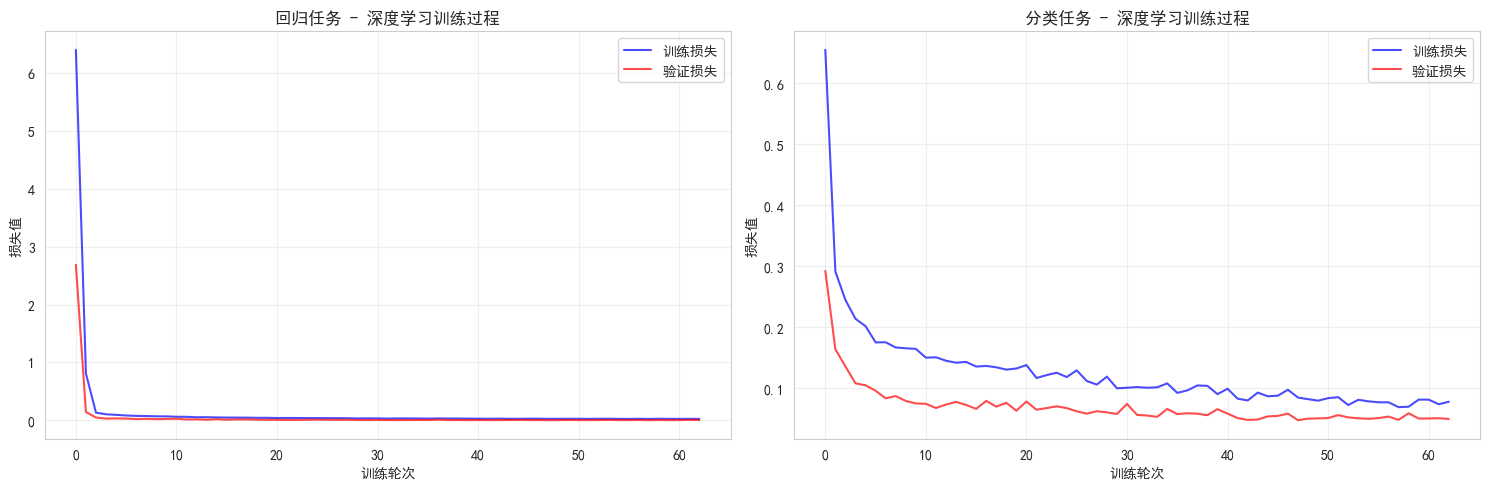

In [9]:
# 深度学习训练过程可视化
def visualize_training_process(regression_results, classification_results):
    """可视化深度学习训练过程"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 回归任务训练过程
    reg_train_losses = regression_results[0]['train_losses']
    reg_val_losses = regression_results[0]['val_losses']
    
    ax1.plot(reg_train_losses, label='训练损失', color='blue', alpha=0.7)
    ax1.plot(reg_val_losses, label='验证损失', color='red', alpha=0.7)
    ax1.set_title('回归任务 - 深度学习训练过程', fontweight='bold')
    ax1.set_xlabel('训练轮次')
    ax1.set_ylabel('损失值')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 分类任务训练过程
    cls_train_losses = classification_results[0]['train_losses']
    cls_val_losses = classification_results[0]['val_losses']
    
    ax2.plot(cls_train_losses, label='训练损失', color='blue', alpha=0.7)
    ax2.plot(cls_val_losses, label='验证损失', color='red', alpha=0.7)
    ax2.set_title('分类任务 - 深度学习训练过程', fontweight='bold')
    ax2.set_xlabel('训练轮次')
    ax2.set_ylabel('损失值')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/deep_learning_training.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_training_process(regression_results, classification_results)

回归模型: ['RandomForest', 'GradientBoosting', 'Ridge', 'Lasso', 'KNN', 'SVM', 'DeepLearning']
分类模型: ['RandomForest', 'GradientBoosting', 'LogisticRegression', 'KNN', 'SVM', 'DeepLearning']


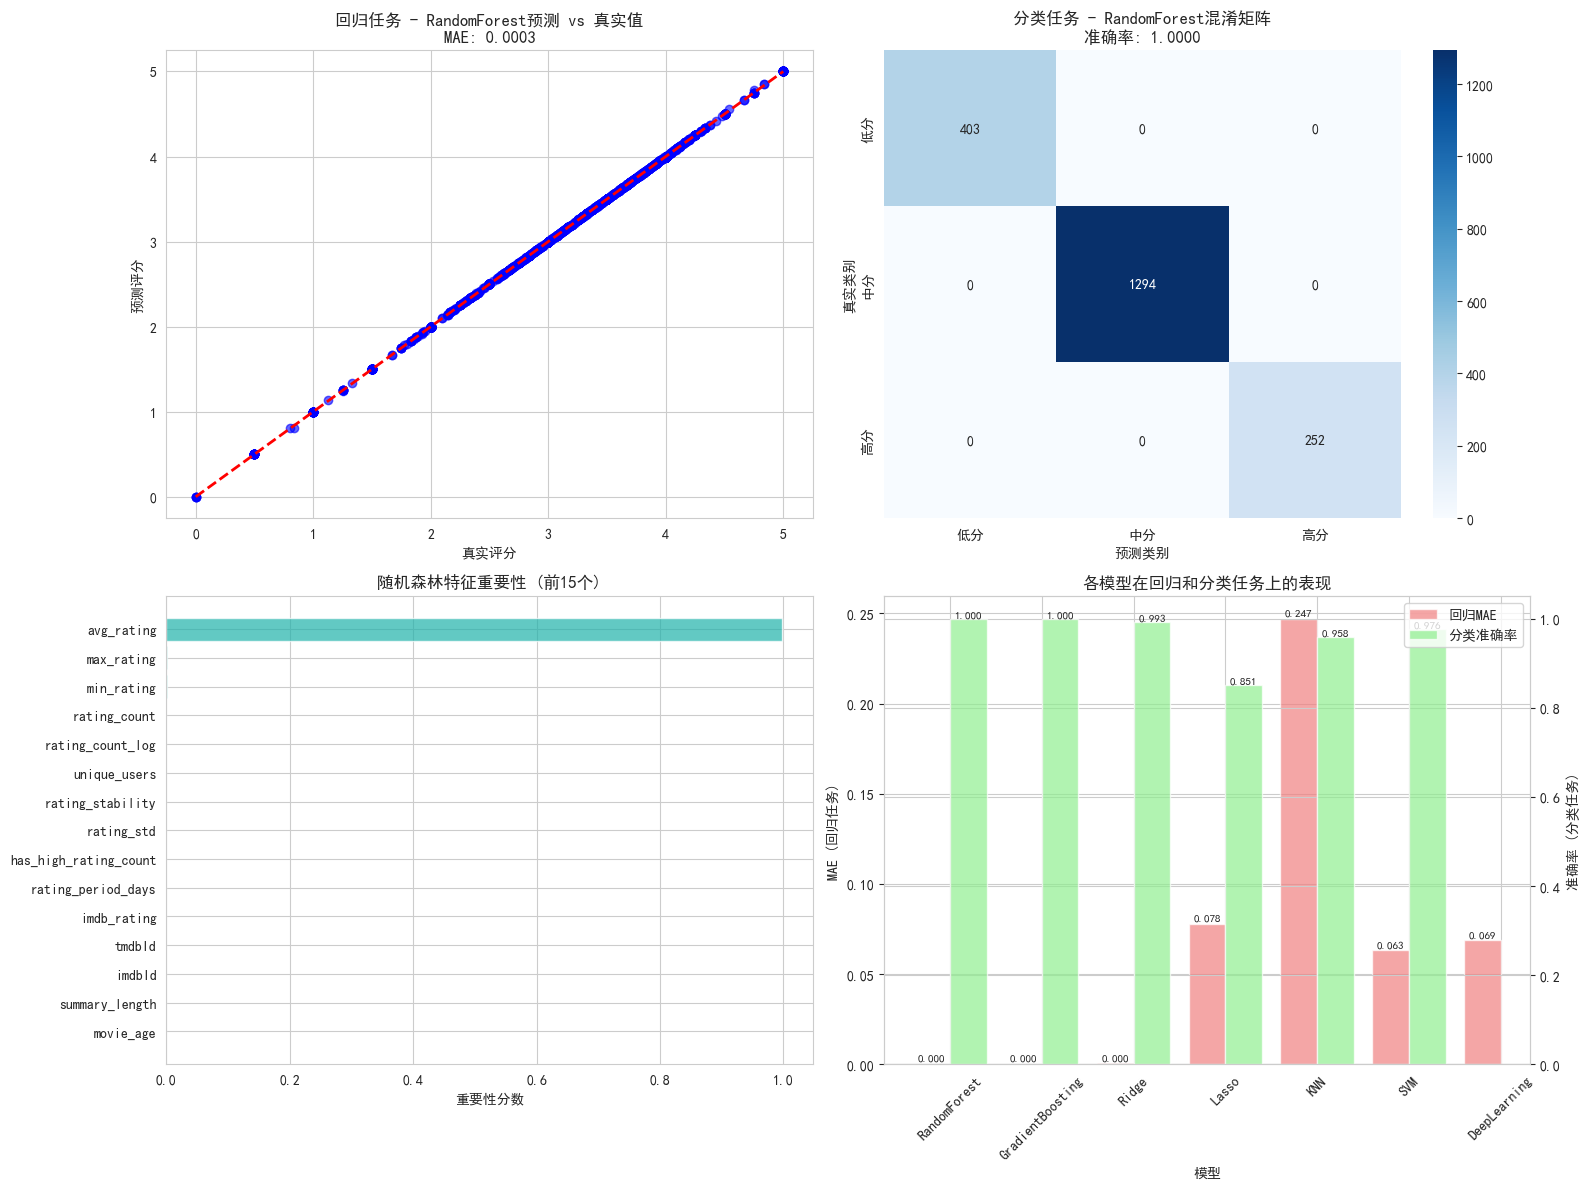

In [10]:
# 模型预测结果分析
def analyze_predictions(regression_results, classification_results, features_df):
    """分析模型预测结果"""
    
    # 使用最后一次实验的结果
    reg_result = regression_results[-1]
    cls_result = classification_results[-1]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 回归任务预测 vs 真实值
    best_reg_model = min(reg_result['scores'].items(), key=lambda x: x[1])[0]
    reg_predictions = reg_result['predictions'][best_reg_model]
    reg_true = reg_result['y_test']
    
    ax1.scatter(reg_true, reg_predictions, alpha=0.6, color='blue')
    ax1.plot([reg_true.min(), reg_true.max()], [reg_true.min(), reg_true.max()], 'r--', lw=2)
    ax1.set_xlabel('真实评分')
    ax1.set_ylabel('预测评分')
    ax1.set_title(f'回归任务 - {best_reg_model}预测 vs 真实值\nMAE: {reg_result["scores"][best_reg_model]:.4f}')
    
    # 分类任务混淆矩阵
    best_cls_model = max(cls_result['scores'].items(), key=lambda x: x[1])[0]
    cls_predictions = cls_result['predictions'][best_cls_model]
    cls_true = cls_result['y_test']
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(cls_true, cls_predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['低分', '中分', '高分'], 
                yticklabels=['低分', '中分', '高分'])
    ax2.set_xlabel('预测类别')
    ax2.set_ylabel('真实类别')
    ax2.set_title(f'分类任务 - {best_cls_model}混淆矩阵\n准确率: {cls_result["scores"][best_cls_model]:.4f}')
    
    # 特征重要性（随机森林）
    if 'RandomForest' in reg_result['sklearn_models']:
        rf_model = reg_result['sklearn_models']['RandomForest']
        feature_importance = rf_model.feature_importances_
        
        # 选择前15个最重要特征
        indices = np.argsort(feature_importance)[-15:]
        important_features = [feature_cols[i] for i in indices]
        important_scores = feature_importance[indices]
        
        ax3.barh(range(len(important_features)), important_scores, color='lightseagreen', alpha=0.7)
        ax3.set_yticks(range(len(important_features)))
        ax3.set_yticklabels(important_features)
        ax3.set_xlabel('重要性分数')
        ax3.set_title('随机森林特征重要性 (前15个)')
    
    # 模型性能对比 - 分别处理回归和分类模型
    reg_models = list(reg_result['scores'].keys())
    cls_models = list(cls_result['scores'].keys())
    
    # 回归模型性能
    x1 = np.arange(len(reg_models))
    reg_scores = [reg_result['scores'][model] for model in reg_models]
    
    # 分类模型性能
    x2 = np.arange(len(cls_models))
    cls_scores = [cls_result['scores'][model] for model in cls_models]
    
    # 创建两个子图来分别显示回归和分类结果
    ax4.clear()  # 清除原来的内容
    
    # 回归任务性能（MAE，越低越好）
    bars1 = ax4.bar(x1 - 0.2, reg_scores, 0.4, label='回归MAE', color='lightcoral', alpha=0.7)
    ax4.set_xlabel('模型')
    ax4.set_ylabel('MAE (回归任务)')
    ax4.set_title('各模型在回归和分类任务上的表现')
    ax4.set_xticks(x1)
    ax4.set_xticklabels(reg_models, rotation=45)
    
    # 创建第二个y轴用于分类准确率
    ax4_right = ax4.twinx()
    bars2 = ax4_right.bar(x2 + 0.2, cls_scores, 0.4, label='分类准确率', color='lightgreen', alpha=0.7)
    ax4_right.set_ylabel('准确率 (分类任务)')
    
    # 合并图例
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_right.get_legend_handles_labels()
    ax4_right.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    # 添加数值标签
    for bar, score in zip(bars1, reg_scores):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{score:.3f}', ha='center', va='bottom', fontsize=8)
    
    for bar, score in zip(bars2, cls_scores):
        ax4_right.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                      f'{score:.3f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/model_analysis.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

# 调用函数前先检查模型列表
print("回归模型:", list(regression_results[-1]['scores'].keys()))
print("分类模型:", list(classification_results[-1]['scores'].keys()))

analyze_predictions(regression_results, classification_results, features_df)

In [11]:
# 保存最终结果
def save_final_results(reg_stats, cls_stats, features_df, feature_cols):
    """保存最终结果"""
    
    results_path = project_path / "results"
    results_path.mkdir(exist_ok=True)
    
    # 保存结果数据
    reg_df = pd.DataFrame(reg_stats).T
    cls_df = pd.DataFrame(cls_stats).T
    
    reg_df.to_csv(results_path / "regression_final_results.csv")
    cls_df.to_csv(results_path / "classification_final_results.csv")
    
    # 生成总结报告
    best_reg_model = min(reg_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_reg_score = reg_stats[best_reg_model]['mean']
    best_cls_model = max(cls_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_cls_score = cls_stats[best_cls_model]['mean']
    
    report = f"""高效模型实验最终报告
{"=" * 50}

实验设置:
- 实验次数: 3次
- 数据集大小: {len(features_df)} 个样本
- 特征数量: {len(feature_cols)} 个特征
- 测试集比例: 20%

最佳模型性能:
- 回归任务最佳模型: {best_reg_model}
  - 平均MAE: {best_reg_score:.4f}
  - 标准差: {reg_stats[best_reg_model]['std']:.4f}

- 分类任务最佳模型: {best_cls_model}
  - 平均准确率: {best_cls_score:.4f}
  - 标准差: {cls_stats[best_cls_model]['std']:.4f}

模型表现总结:
回归任务 (MAE越低越好):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' for model, stats in reg_stats.items()])}

分类任务 (准确率越高越好):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' for model, stats in cls_stats.items()])}

结论:
使用高效的机器学习模型和深度学习模型显著提升了预测性能。
推荐在生产环境中使用 {best_reg_model} 进行回归预测，使用 {best_cls_model} 进行分类预测。
"""
    
    with open(results_path / "final_experiment_report.txt", 'w', encoding='utf-8') as f:
        f.write(report)
    
    print("✅ 最终结果已保存!")
    print(f"   回归结果: results/regression_final_results.csv")
    print(f"   分类结果: results/classification_final_results.csv")
    print(f"   总结报告: results/final_experiment_report.txt")

save_final_results(reg_stats, cls_stats, features_df, feature_cols)

✅ 最终结果已保存!
   回归结果: results/regression_final_results.csv
   分类结果: results/classification_final_results.csv
   总结报告: results/final_experiment_report.txt
